<a href="https://colab.research.google.com/github/sdivyakolu/Pytorch_Tutorial/blob/main/EMNIST_Classification_UsingDNN_DenseNuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install pytorch_lightning

In [18]:
pip install torch matplotlib numpy pandas torchvision

In [19]:
pip install mlflow

In [20]:
pip install pyngrok

In [21]:
#Run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &")

#Create remote tunnel using ngrok.com to allow local port access
from pyngrok import ngrok

#Terminate open turnnels if they exists
ngrok.kill()

#Setting the authtoken ( optional)
#Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN="2yVqRPkzG1tUdthF1CtvMkgaPz2_32B4CGeeG5A1tXrnLeC4u"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

#Open an https tunnel on port 5000 for http://localhost:5000
ngrok_tunnel=ngrok.connect(addr="5000",proto="http",bind_tls=True)

print("MLFlow Tracking UI:",ngrok_tunnel.public_url)

ERROR:pyngrok.process.ngrok:t=2025-06-15T19:46:38+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2025-06-15T19:46:38+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok st

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.

In [22]:
import mlflow
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import Dataset,DataLoader



In [24]:
from google.colab import drive

#drive.mount('/content/drive')
#drive.mount("/content/sample_data")

emnist_train_data=pd.read_csv("/content/sample_data/emnist-letters-train.csv",header=None)
emnist_test_data=pd.read_csv("/content/sample_data/emnist-letters-test.csv",header=None)
emnist_train_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,17,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,13,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,24,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
emnist_test_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
emnist_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,1629.000000,1629.0,1629.0,1629.0,1629.0,1629.000000,1629.000000,1629.000000,1629.0,1629.0,...,1628.0,1628.0,1628.0,1628.0,1628.0,1628.0,1628.0,1628.0,1628.0,1628.0
mean,13.383057,0.0,0.0,0.0,0.0,0.019644,0.112339,0.008594,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.486719,0.0,0.0,0.0,0.0,0.792847,4.534094,0.346871,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,13.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,0.0,32.000000,183.000000,14.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
emnist_test_data = emnist_test_data.sample(frac=1)
emnist_test_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
215,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1489,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
848,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
971,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1823,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
classes= ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

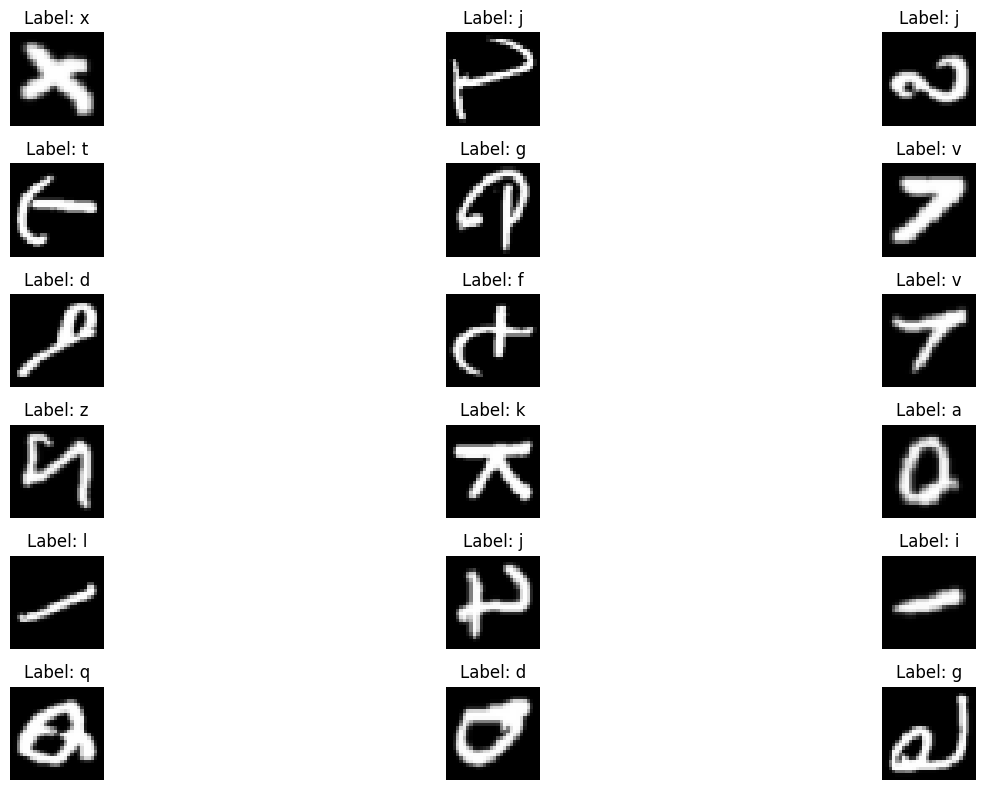

In [29]:
#Assuming first column contains the labels and rest are pixal values
train_labels=emnist_train_data.values[:,0]
train_images=emnist_train_data.values[:,1:]

#Reshape the images to ( num_samples, 28,28)
train_images=train_images.reshape(-1,28,28)

#Display a few random images
num_samples=18

random_indices=np.random.randint(0,len(train_images),num_samples)

random_indices

fig=plt.figure(figsize=(16,8))

for i,idx in enumerate(random_indices):
  plt.subplot(6,int(num_samples/6),i+1)
  plt.imshow(train_images[idx]/255.0,cmap='gray')
  plt.title(f"Label: {classes[int(train_labels[idx]-1)]}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
experiment_id=mlflow.create_experiment(name='test_experiment')
experiment_id

'293786591062881457'

In [31]:
experiment=mlflow.get_experiment(experiment_id)

print("Name:{}".format(experiment.name))
print("Experiment_id:{}".format(experiment.experiment_id))
print("Artifcat Location:{}".format(experiment.artifact_location))
print("Tags:{}".format(experiment.tags))
print("Lifecycle_stage:{}".format(experiment.lifecycle_stage))
print("Creation timestam:{}".format(experiment.creation_time))



Name:test_experiment
Experiment_id:293786591062881457
Artifcat Location:file:///content/mlruns/293786591062881457
Tags:{}
Lifecycle_stage:active
Creation timestam:1750016869962


In [32]:
mlflow.set_experiment(experiment_name='test_experiment')


<Experiment: artifact_location='file:///content/mlruns/293786591062881457', creation_time=1750016869962, experiment_id='293786591062881457', last_update_time=1750016869962, lifecycle_stage='active', name='test_experiment', tags={}>

In [33]:
mlflow.start_run()


<ActiveRun: >

In [34]:
mlflow.end_run()

In [35]:
data_info="""
the EMNIST dataset is a set of handwritten character digits derived
from the NIST special database 19 and converted to  a 28x28 pixel image format and dataset
structure that directly matches the MNIST dataset
Further information on the dataset contents and conversion process can be found in
the paper avaialbel at https://arxiv.org/abs/1702.05373v1.
"""

with open("data_info.txt","w") as f:
  f.write(data_info)

In [36]:
#STart with mlflow.start_run will automatically end_run. so, it is best practice
with mlflow.start_run(run_name='test_experiment_run') as current_run:
  mlflow.log_metric('Accuracy',0.67)
  params={
      'num_nn_layers':4
  }
  mlflow.log_params(params)
  mlflow.log_figure(fig,'sample_images.png')
  mlflow.log_artifact('data_info.txt')
  mlflow.set_tag('EMNIST','classification using DNNs')

In [37]:
from torch.utils.data import Dataset

In [38]:
class EMNISTDataset(Dataset):
  def __init__(self,dataframe):
    self.images=torch.tensor(dataframe.iloc[:,1:].values,dtype=torch.float32)
    self.labels=torch.tensor(dataframe.iloc[:,0].values,dtype=torch.float32)

  def __len__(self):
    return len(self.images)

  def __getitem__(self,idx):
    images= self.images[idx]
    images = images/255.0
    labels = self.labels[idx]

    return images,labels

In [39]:
train_dataset=EMNISTDataset(emnist_train_data)

test_dataset=EMNISTDataset(emnist_test_data)

len(train_dataset),len(test_dataset)

(1629, 2127)

In [40]:
from torch.utils.data import random_split

val_percent=0.1
val_len=int(val_percent*len(train_dataset))

train_ds,vals_ds=random_split(train_dataset,[len(train_dataset)-val_len,val_len])

print(len(train_ds),len(vals_ds))

1467 162


In [41]:
batch_size=64

train_dataloader=DataLoader(train_ds,batch_size,shuffle=True,drop_last=True, num_workers=1)

val_dataloader=DataLoader(vals_ds,batch_size,num_workers=1)
test_dataloader=DataLoader(test_dataset,batch_size,num_workers=1)

len(train_dataloader),len(val_dataloader),len(test_dataloader)



(22, 3, 34)

In [42]:
dataiter=iter(train_dataloader)
batch_images,batch_labels=next(dataiter)

batch_images.shape,batch_labels.shape
batch_images

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [43]:
batch_labels

tensor([21.,  8.,  5., 17., 21.,  6., 10., 13.,  3., 10.,  4., 22.,  2.,  3.,
        20., 12., 10.,  6., 19.,  5.,  2., 16., 15.,  5., 15., 18., 15., 15.,
        20., 20., 13.,  2., 11., 26.,  5.,  1.,  1.,  7., 10., 24., 16., 10.,
        25., 13., 21.,  2., 22., 13., 14., 25., 17.,  1., 19.,  5., 19., 18.,
         8., 26., 12., 18., 11., 10., 26.,  7.])

In [44]:
batch_images.shape , len(batch_labels)

(torch.Size([64, 784]), 64)

In [45]:
import mlflow
experiment_id=mlflow.create_experiment(name="emnist_letters_prediction_dnn")

mlflow.set_experiment(experiment_name="emnist_letters_prediction_using_dnn")

2025/06/15 19:48:22 INFO mlflow.tracking.fluent: Experiment with name 'emnist_letters_prediction_using_dnn' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/921688214561401275', creation_time=1750016902259, experiment_id='921688214561401275', last_update_time=1750016902259, lifecycle_stage='active', name='emnist_letters_prediction_using_dnn', tags={}>

In [46]:
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import pytorch_lightning as pl

from torchmetrics.functional import accuracy


In [47]:
input_size=28*28

output_size=26

In [48]:
class EmnistMode(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.criterion=nn.CrossEntropyLoss()

    self.linear1=nn.Linear(input_size,512)
    self.linear2=nn.Linear(512,128)
    self.Linear3=nn.Linear(128,32)
    self.Linear4=nn.Linear(32,output_size)

  def forward(self,xb):
    out=self.linear1(xb)
    out=F.relu(out)

    out=self.linear2(out)
    out=F.relu(out)

    out=self.Linear3(out)
    out=F.relu(out)

    out=self.linear4(out)
    return out

  def configure_optimizers(self):

    return optim.adam(self.parameters(),lr=0.0001)

  def training_setup(self,batch,batch_idx):
    x,y=batch
    y-=1

    y_hat=self(x)
    loss=self.criterion(y_hat,y)
    pred=y_hat.argmax(dim=1)

    acc=accuracy(pred,y,task="multiclass",num_classes=26)
    self.log("train_loss",loss,on_epoch=True,prog_bar=True)
    self.log("train_acc",acc,on_epoch=True,prog_bar=True)

    return loss

  def validation_step(self,batch,batch_idex):
    x,y=batch
    y-=1

    y_hat=self(x)
    loss=self.criterion(y_hat,y)
    pred=y_hat.argmax(dim=1)

    acc=accuracy(pred,y,task="multiclass",num_classes=26)
    self.log("train_loss",loss,on_epoch=True,prog_bar=True)
    self.log("train_acc",acc,on_epoch=True,prog_bar=True)

    retun acc

def test_step(self,batch,batch_idx):
  x,y=batch
  y-= 1

  y_hat=self(x)
  loss=self.criterion(y_hat,y)
  pred=y_hat.argmax(dim=1)

  acc=accuracy(pred,y,task="multiclass" num_classes=26)
  self.log("test_loss",loss,logger=True)
  self.log("test_acc",acc, logger=True)
  return acc

def predict_step(self,batch,batch_idx,dataloader_idx=0):
  x,y=batch
  return self(x)
